In [682]:
import pandas as pd
import numpy as np 
import scipy.stats as sps
import matplotlib.pyplot as plt
from tqdm import tqdm
plt.style.use('ggplot')
import warnings
warnings.filterwarnings('ignore')

In [688]:

ctr_1 = 0.91
ctr_2 = 0.93
N_ = 100000
stop_num = 2.25* N_**.5
true_1_winner = 0
true_2_winner = 0
no_winner = 0
plot_df = pd.DataFrame()
for _ in tqdm(range(100)):
    result_sum = 0
    result_1 = 0
    result_2 = 0
    for seq_ in range(N_):
        result_1 += sps.binom(1,ctr_1).rvs(1500).sum()
        result_2 += sps.binom(1,ctr_2).rvs(1500).sum()
        plot_df.loc[seq_,_] = result_2 - result_1
        if (result_2 - result_1) > stop_num:
            true_1_winner+=1
            break
        if (result_1 - result_2) > stop_num:
            true_2_winner+=1
            break
        if (result_1 + result_2) >= N_:
            no_winner+=1
            break



100%|██████████| 100/100 [00:03<00:00, 30.75it/s]


In [695]:
plot_df.idxmax().mean()

23.45

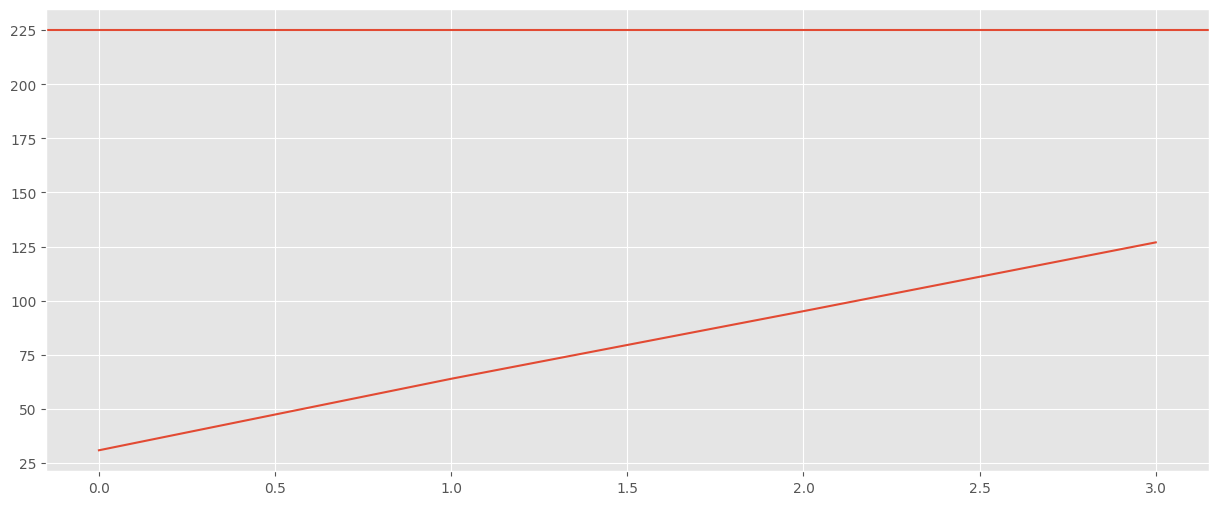

In [684]:
plot_df.mean(axis=1).plot()
plt.axhline(stop_num)

In [564]:
N_days = 30
N_samples = 1000
ctr_1 = 0.95
ctr_2 = 0.96
daily_samples = 1500
count_1 = 0
count_2 = 0
result_1 = 0
result_2 = 0
plot_df_beta = pd.DataFrame()
for seq_ in tqdm(range(1,N_days)):


    result_1 += sps.binom(1,ctr_1).rvs((daily_samples,N_samples)).sum(axis=0)
    result_2 += sps.binom(1,ctr_2).rvs((daily_samples,N_samples)).sum(axis=0)

    count_1 += np.repeat(daily_samples,N_samples)
    count_2 += np.repeat(daily_samples,N_samples)


    beta_1 = sps.beta(result_1,count_1 - result_1).rvs((10000,N_samples))
    beta_2 = sps.beta(result_2,count_2 - result_2).rvs((10000,N_samples))
    # plot_df_beta[seq_] = np.clip((beta_2 - beta_1),0,1).mean(axis=0)
    plot_df_beta.loc[seq_,'uplift'] = (beta_2 - beta_1).mean()
    plot_df_beta.loc[seq_,'probability'] = (beta_2 > beta_1).mean()
    # if (plot_df_beta.loc[:,seq_]>0.95).cumsum().iloc[-1]>5:   
    #     break

100%|██████████| 29/29 [00:59<00:00,  2.04s/it]


In [568]:
from mm_ab import  get_ab_size

In [679]:
get_ab_size(0.01,(0.95*(1-0.95))**0.5,beta=0.2)

7456.435747631641

In [676]:
test_1 =  sps.binom(1,ctr_1).rvs((9800,N_samples))
test_2 =  sps.binom(1,ctr_1).rvs((9800,N_samples))

In [677]:
np.mean(sps.ttest_ind(test_1,test_2).pvalue <= 0.05)

0.051

<AxesSubplot:>

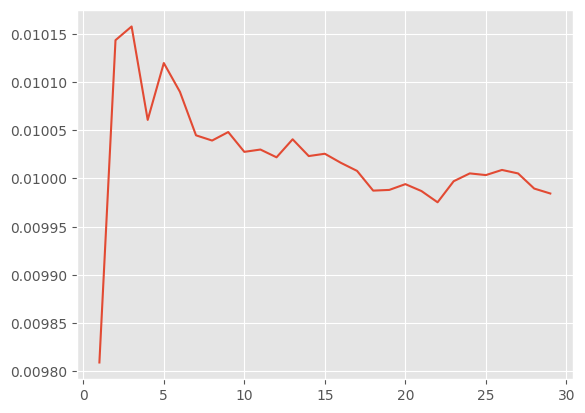

In [565]:
plot_df_beta['uplift'].plot()

In [680]:
plot_df_beta['probability']

1     0.823762
2     0.911623
3     0.948946
4     0.969951
5     0.982506
6     0.989503
7     0.993394
8     0.995761
9     0.997379
10    0.998539
11    0.999217
12    0.999422
13    0.999640
14    0.999789
15    0.999862
16    0.999903
17    0.999947
18    0.999962
19    0.999975
20    0.999979
21    0.999991
22    0.999994
23    0.999997
24    0.999999
25    0.999999
26    1.000000
27    1.000000
28    1.000000
29    1.000000
Name: probability, dtype: float64

<AxesSubplot:>

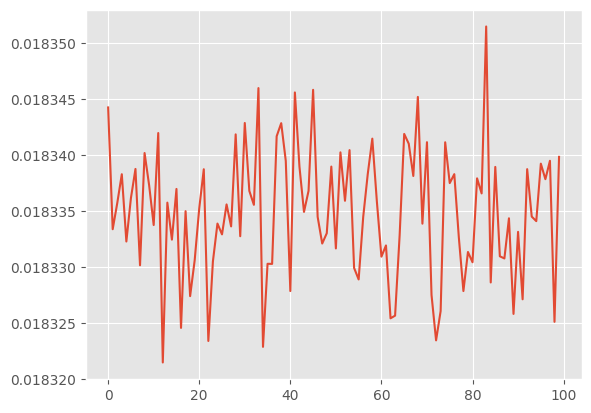

In [485]:
plot_df_beta.mean(axis=1).plot()